In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('./advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
#check duplicates
df.duplicated().sum()

0

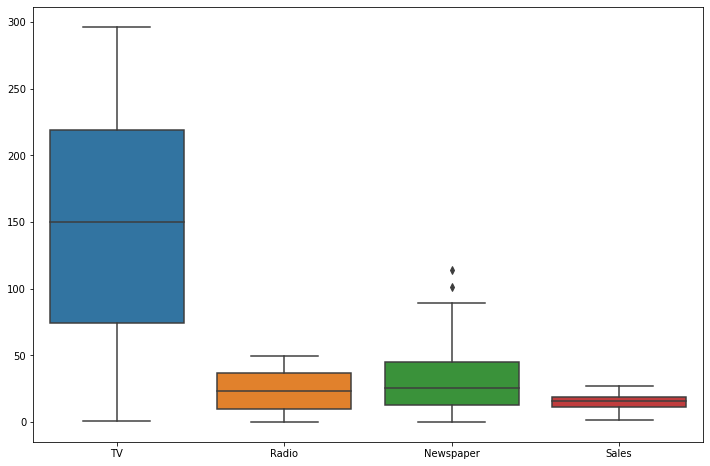

In [10]:
#create box plots for each column
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

<Figure size 864x576 with 0 Axes>

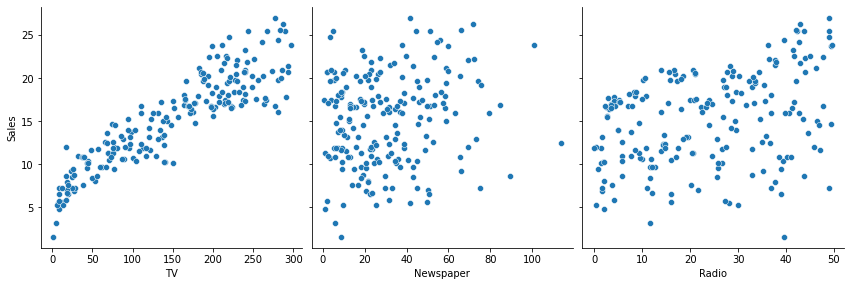

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


In [12]:
x=df[['TV', 'Newspaper', 'Radio']]
y=df['Sales']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [16]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train_scaled, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(X_test_scaled, y_test))
y_pred=Lin_reg.predict(X_test_scaled)

15.355625
[ 4.54624242 -0.07507122  1.6383335 ]
0.8645053923967725


In [17]:
print("R^2 Score - "+str(metrics.r2_score(y_test,y_pred))
        +"\nMean Squared Error - "+str(metrics.mean_squared_error(y_test,y_pred))
        +"\nMean Absolute Error - "+str(metrics.mean_absolute_error(y_test,y_pred)))

R^2 Score - 0.8645053923967725
Mean Squared Error - 4.522552562041288
Mean Absolute Error - 1.417031303060066


Text(0.5, 1.0, 'Actual VS Predicted(MLR)')

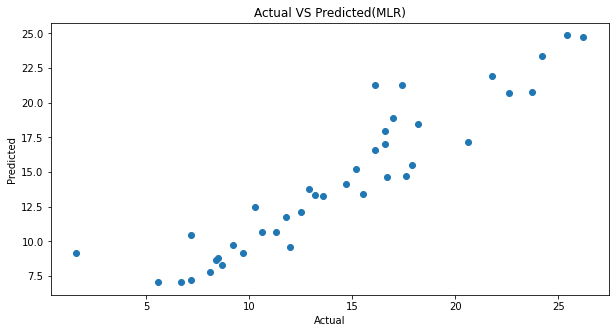

In [21]:
#visualising results
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted(MLR)')

In [18]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X_train_scaled)
poly_reg.fit(x_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)
y_pred_poly=lin_reg_2.predict(poly_reg.fit_transform(X_test_scaled))

In [19]:
print("R^2 Score - "+str(metrics.r2_score(y_test,y_pred_poly))
        +"\nMean Squared Error - "+str(metrics.mean_squared_error(y_test,y_pred_poly))
        +"\nMean Absolute Error - "+str(metrics.mean_absolute_error(y_test,y_pred_poly)))

R^2 Score - 0.914823908162915
Mean Squared Error - 2.8430161109474064
Mean Absolute Error - 1.157590383195288


Text(0.5, 1.0, 'Actual VS Predicted(PLR)')

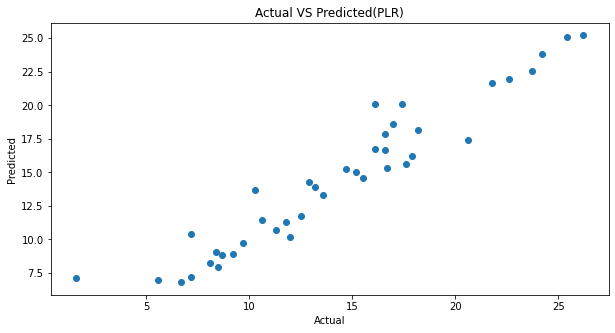

In [20]:
#visualising results
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_poly)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted(PLR)')